Total Time: 12


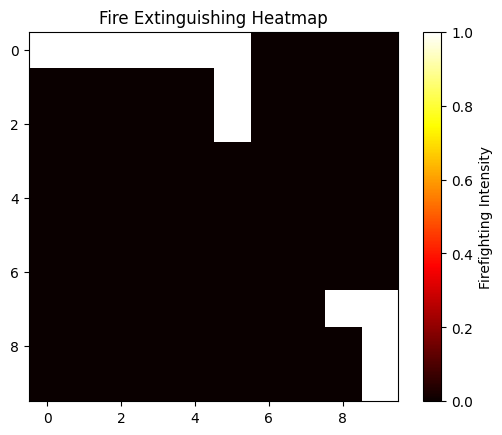

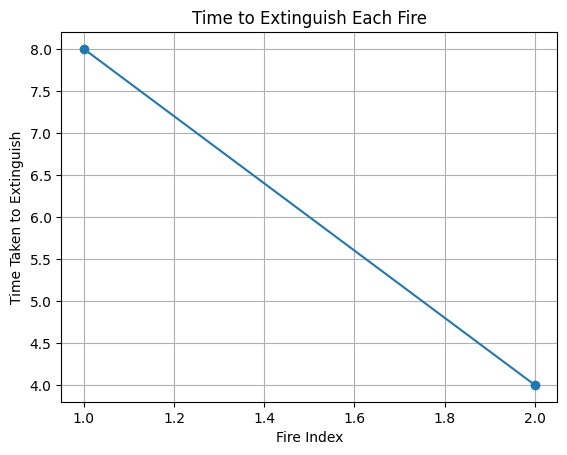

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from heapq import heappush, heappop

def neighbors(r, c, rows, cols):
    for dr, dc in [(0,1),(1,0),(0,-1),(-1,0)]:
        nr, nc = r+dr, c+dc
        if 0 <= nr < rows and 0 <= nc < cols:
            yield nr, nc

def fire_bfs(grid, fire_cells):
    rows, cols = grid.shape
    fire_time = np.full((rows,cols), np.inf)
    q = deque()

    for r, c in fire_cells:
        fire_time[r][c] = 0
        q.append((r, c, 0))

    while q:
        r, c, t = q.popleft()
        for nr, nc in neighbors(r, c, rows, cols):
            if fire_time[nr][nc] > t + 1:
                fire_time[nr][nc] = t + 1
                q.append((nr, nc, t + 1))
    return fire_time

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal):
    rows, cols = grid.shape
    pq = []
    heappush(pq, (0, 0, start, [start]))
    visited = set()

    while pq:
        est, cost, node, path = heappop(pq)
        if node == goal:
            return path

        if node in visited:
            continue
        visited.add(node)

        for nr, nc in neighbors(node[0], node[1], rows, cols):
            if (nr, nc) not in visited:
                heappush(
                    pq,
                    (cost + 1 + heuristic((nr, nc), goal),
                     cost + 1,
                     (nr, nc),
                     path + [(nr, nc)])
                )
    return None

def assign_fires(firefighters, fires):
    assign = {f: [] for f in firefighters}
    for fire in fires:
        best = min(firefighters, key=lambda f: heuristic(f, fire))
        assign[best].append(fire)
    return assign

def visualize_heatmap(paths, grid):
    heatmap = np.zeros_like(grid)
    for p in paths:
        for r, c in p:
            heatmap[r][c] += 1

    plt.imshow(heatmap, cmap="hot", interpolation="nearest")
    plt.colorbar(label="Firefighting Intensity")
    plt.title("Fire Extinguishing Heatmap")
    plt.show()

def plot_time_graph(times):
    plt.plot(range(1, len(times)+1), times, marker='o')
    plt.xlabel("Fire Index")
    plt.ylabel("Time Taken to Extinguish")
    plt.title("Time to Extinguish Each Fire")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    grid = np.zeros((10, 10), dtype=int)

    # Fire and firefighter positions
    fire_cells = [(2, 5), (7, 8)]
    firefighters = [(0, 0), (9, 9)]

    fire_time = fire_bfs(grid, fire_cells)
    assignments = assign_fires(firefighters, fire_cells)

    all_paths = []
    times_per_fire = []

    for ff, flist in assignments.items():
        curr = ff
        for fire in flist:
            p = a_star(grid, curr, fire)
            if p:
                all_paths.append(p)
                times_per_fire.append(len(p))  # time for this fire
                curr = fire

    total_time = sum(times_per_fire)
    print("Total Time:", total_time)

    # Heatmap visualization
    visualize_heatmap(all_paths, grid)

    # NEW: Time graph (required output)
    plot_time_graph(times_per_fire)